In [1]:
from utils import load_grades_data, load_heart_data, load_wine_data, generate_silhoutte_score_plot, generate_kmeans_SV_ICD_plots, generate_distance_bw_gmms_plots, generate_bic_plot
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import FastICA, PCA
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import random_projection
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import TruncatedSVD
np.random.seed(5)

In [3]:
X = load_wine_data()

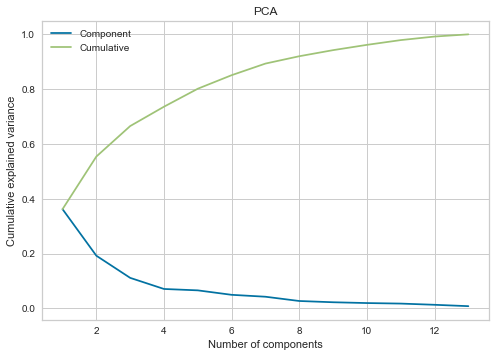

In [5]:
#print('Kurtosis for normal distribution:', kurtosis(y)) 

pca = PCA().fit(X)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, label="Component")
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), label="Cumulative")
plt.title("Component-wise and Cumulative Explained Variance")
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.legend(loc="best")
plt.title("PCA")
plt.show()



In [7]:
start = time.time()
pca = PCA(n_components= 3).fit(X)
print("Time(s) " + str(time.time() - start))
print("Original shape:", X.shape)
X_pca = pca.transform(X)
print("Transformed shape:", X_pca.shape)




Time(s) 0.0015799999237060547
Original shape: (178, 13)
Transformed shape: (178, 3)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)
clf = DecisionTreeClassifier(random_state=5, max_depth=4, min_samples_leaf=9)
cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
print("Cross validation score: " + str(cv_score))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))

Cross validation score: 0.792948717948718
Test Accuracy: 0.819672131147541


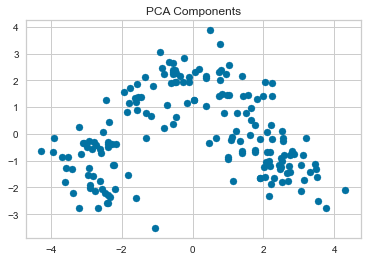

In [15]:
n = 2
pca = PCA(n_components=n) 
X_pca=pca.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('PCA Components')


plt.scatter(X_pca[:,0], X_pca[:,1])

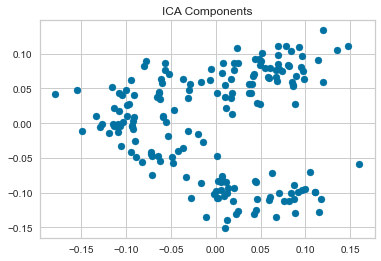

In [17]:
n = 2
ica = FastICA(n_components=n, max_iter=10000, tol=0.1) 
X_ica=ica.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('ICA Components')


plt.scatter(X_ica[:,0], X_ica[:,1])


In [56]:
best_n = (0, 0)
for i in range(2, 22):
    rp = random_projection.SparseRandomProjection(n_components=i, random_state=5).fit(X)
    X_rp = rp.fit_transform(X)  
    X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
    clf = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 9)
    cv_score = cross_val_score(clf, X_train, y_train, cv=20).mean()
    if (cv_score > best_n[1]):
        best_n = (i, cv_score)

print("Best n_components: " + str(best_n[0]))
rp = random_projection.SparseRandomProjection(n_components=best_n[0], random_state=5).fit(X)
X_rp = rp.fit_transform(X)  
X_train, X_test, y_train, y_test = train_test_split(X_rp, y, test_size=0.2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_test, y_pred)
print("Test Accuracy: " + str(score))


Best n_components: 15
Test Accuracy: 0.8688524590163934


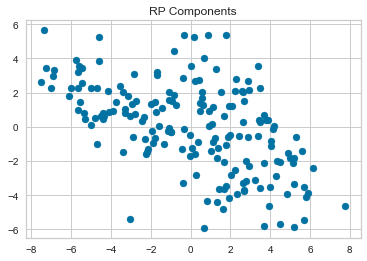

In [19]:
n = 2
rp = random_projection.SparseRandomProjection(n_components=n)
X_rp=rp.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('RP Components')


plt.scatter(X_rp[:,0], X_rp[:,1])

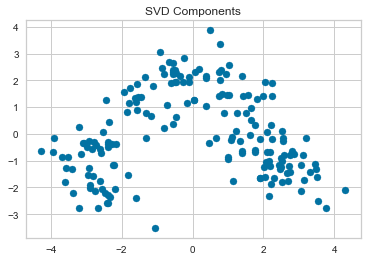

In [20]:
n = 2
svd = TruncatedSVD(n_components=n)
X_svd=svd.fit_transform(X)

plt.figure(figsize=(6,4))
plt.title('SVD Components')

plt.scatter(X_svd[:,0], X_svd[:,1])